In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as fit
import datetime as dt

In [4]:
# Problem 1(a):
land_temp = pd.read_csv('GlobalLandTemperaturesByState.csv')
fdf1 = land_temp[['dt', 'AverageTemperature', 'State']]
fdf1['dt'] = pd.to_datetime(fdf1['dt'], format='%Y-%m-%d')
fdf2 = fdf1.loc[(fdf1['dt'].dt.year > 2000)]
states = ['Wyoming', 'Nebraska', 'South Dakota']
fdf3 = fdf2[fdf2.State.isin(states)]
fdf3

C:\Users\Kayhan Kolhatkar\AppData\Local\Temp\ipykernel_20416\2863167989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf1['dt'] = pd.to_datetime(fdf1['dt'], format='%Y-%m-%d')


,dt,AverageTemperature,State
350773,2001-01-01,-2.592,Nebraska
350774,2001-02-01,-5.575,Nebraska
350775,2001-03-01,2.077,Nebraska
350776,2001-04-01,10.431,Nebraska
350777,2001-05-01,15.878,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [5]:
# Problem 1(b):
avg = fdf3.groupby(['dt']).AverageTemperature.mean().reset_index() # use reset_index to convert the level of the index to a column
avg_temp = pd.DataFrame(avg)
avg_temp

,dt,AverageTemperature
0,2001-01-01,-4.480333
1,2001-02-01,-7.541000
2,2001-03-01,0.590333
3,2001-04-01,7.889000
4,2001-05-01,13.908667
...,...,...
148,2013-05-01,13.196000
149,2013-06-01,18.783667
150,2013-07-01,22.110333
151,2013-08-01,21.890000


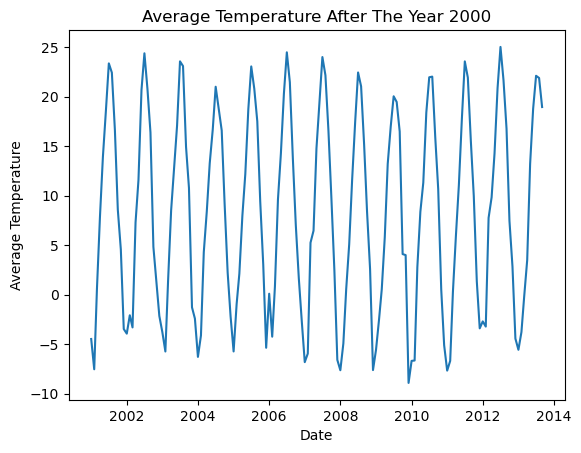

In [27]:
# Problem 1(c):
plt.figure()
plt.plot(avg_temp['dt'], avg_temp['AverageTemperature'])
plt.title("Average Temperature After The Year 2000")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.show()


In [ ]:
# Problem 1(d):
'''
Converted date column to datetime and accessed the year using dt.year

fdf1['dt'] = pd.to_datetime(fdf1['dt'], format='%Y-%m-%d')
fdf2 = fdf1.loc[(fdf1['dt'].dt.year > 2000)]
'''

In [233]:
# Problem 1(e):
def sinusoid(x, A, f, phi, c):
    return A * np.sin(2 * np.pi * f * x + phi) + c

p0 = [44,2,2000,-10]
params, cov = fit.curve_fit(sinusoid, avg_temp['dt'].dt.year, avg_temp['AverageTemperature'], p0)

In [235]:
# Problem 1(f):
params

array([ 5.25485922e+01,  1.99989262e+00,  2.00206181e+03, -1.63419739e+01])

In [229]:
cov

array([[ 4.27770345e+16,  7.17511265e+10, -1.18231827e+15,
        -3.29250150e+16],
       [ 7.17511265e+10,  1.20350243e+05, -1.98313551e+09,
        -5.52260116e+10],
       [-1.18231827e+15, -1.98313551e+09,  3.26782013e+13,
         9.10017644e+14],
       [-3.29250150e+16, -5.52260116e+10,  9.10017644e+14,
         2.53420599e+16]])

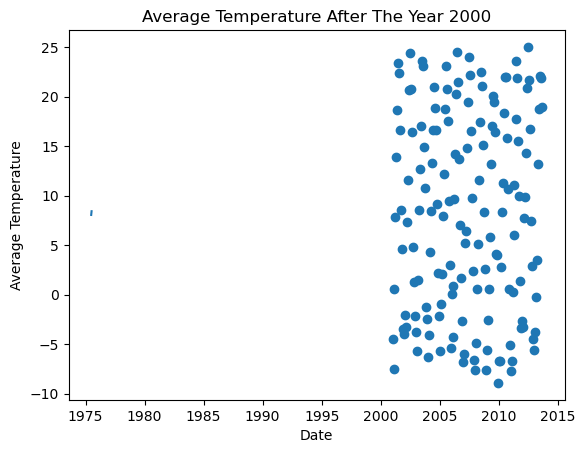

In [237]:
# Problem 1(g):
x = avg_temp['dt'].dt.year.values
a, b, c, d = params
y_fit = sinusoid(x, a, b, c, d)

y = avg_temp['AverageTemperature']
plt.figure()
plt.scatter(avg_temp['dt'], avg_temp['AverageTemperature'])
plt.title("Average Temperature After The Year 2000")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.plot(x, y_fit)
plt.show()

In [231]:
# Problem 1(h):
parameter_errors = np.sqrt(np.diag(cov))

In [239]:
# Problem 1(i):
print("Optimized Parameters and their Errors:")
print(f"Amplitude: {params[0]} ± {parameter_errors[0]}")
print(f"Frequency: {params[1]} ± {parameter_errors[1]}")
print(f"Phase: {params[2]} ± {parameter_errors[2]}")
print(f"Offset: {params[3]} ± {parameter_errors[3]}")

Optimized Parameters and their Errors:
Amplitude: 52.54859223764963 ± 206826097.19171897
Frequency: 1.9998926207823606 ± 346.91532609866925
Phase: 2002.0618088717474 ± 5716485.0487926565
Offset: -16.341973911164732 ± 159191896.31790504


In [245]:
amplitude, frequency, phase, offset = params
amplitude_error, frequency_error, phase_error, offset_error = parameter_errors
equation = f"y = ({amplitude:.2f} ± {amplitude_error:.2f}) * sin({frequency:.4f} * x + {phase:.4f}) + ({offset:.2f} ± {offset_error:.2f})"
print("Final Fitted Equation:")
print(equation)

Final Fitted Equation:
y = (52.55 ± 206826097.19) * sin(1.9999 * x + 2002.0618) + (-16.34 ± 159191896.32)


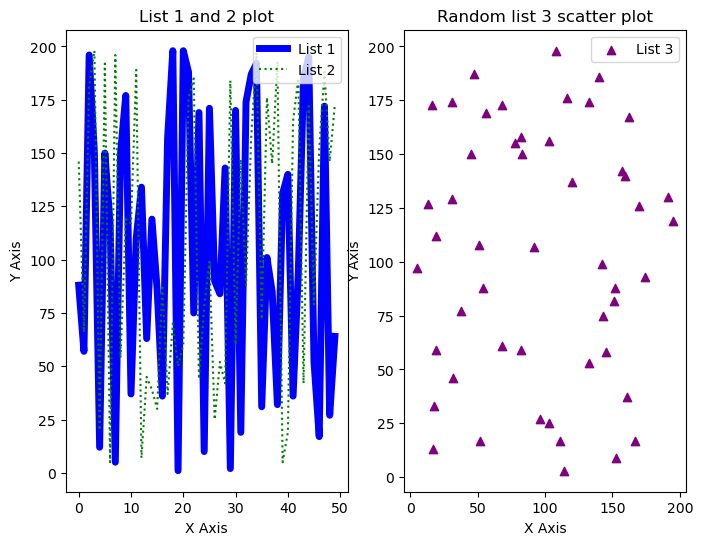

In [44]:
# Problem 2:
random_integers1 = np.random.randint(0, 201, 50)
random_integers2 = np.random.randint(0, 201, 50)
random_integers3 = np.random.randint(0, 201, 50)
random_integers4 = np.random.randint(0, 201, 50)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,6))

# Left subplot:
ax1.plot(random_integers1, color = 'blue', linewidth = 5)
ax1.plot(random_integers2, color = 'green', linestyle = 'dotted')
ax1.set_title('List 1 and 2 plot')
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.legend(['List 1', 'List 2'], loc = 'upper right')

# Right subplot:
ax2.scatter(random_integers3, random_integers4, color = 'purple', marker = '^', label = "List 3")
ax2.set_title('Random list 3 scatter plot')
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')
ax2.legend(loc = 'upper right')

plt.show()

Number of points within a distance of 1 from the origin: 7817
Estimated value of pi: 3.1268


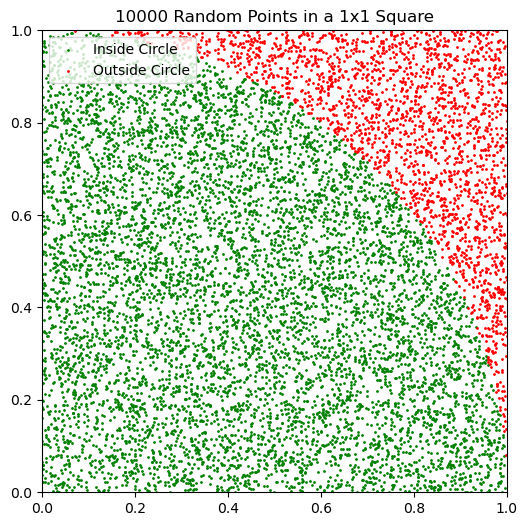

In [64]:
# Problem 3:

# Number of points
N = 10 ** 4

# Generate random x and y coordinates
x = np.random.rand(N)
y = np.random.rand(N)

# Calculate the distance from the origin
distance = np.sqrt(x**2 + y**2)

# Count how many points are within a distance of 1 from the origin
points_inside_quarter_circle = np.sum(distance <= 1)

print(f"Number of points within a distance of 1 from the origin: {points_inside_quarter_circle}")

# Estimate pi using the ratio of points inside the quarter circle
pi_estimate = 4 * points_inside_quarter_circle / N

# Output the estimated value of pi
print(f"Estimated value of pi: {pi_estimate}")

# Identify points inside and outside the quarter circle
inside_circle = distance <= 1
outside_circle = ~inside_circle

# Plot the points inside the circle in one color (e.g., green)
# and the points outside the circle in another color (e.g., red)
plt.figure(figsize=(6, 6))
plt.scatter(x[inside_circle], y[inside_circle], s=1, color='green', label='Inside Circle')
plt.scatter(x[outside_circle], y[outside_circle], s=1, color='red', label='Outside Circle')

# Add a legend
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title(f"{N} Random Points in a 1x1 Square")
plt.show()